In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_excel("C://Users//VIVEK//Downloads//customer_transactions_sample.xlsx", sheet_name = 'Year 2009-2010')

In [3]:
df2 = pd.read_excel("C://Users//VIVEK//Downloads//customer_transactions_sample.xlsx", sheet_name = 'Year 2010-2011')

In [4]:
data = pd.concat([df1,df2], ignore_index = True)

In [5]:
data.to_csv("C://Users//VIVEK//Downloads//concatenated_customer_transactions.csv", index=False)

In [6]:
df = pd.read_csv("C://Users//VIVEK//Downloads//concatenated_customer_transactions.csv")

In [7]:
df.shape

(1067371, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [9]:
Cancellation = []
for i in df['Invoice']:
    if len(i) == 7 :
        Cancellation.append(i)
len(Cancellation)

19500

In [10]:
## Cancel Order is 19500

In [11]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [12]:
df['InvoiceDate'].value_counts()

InvoiceDate
2010-12-06 16:57:00    1350
2010-12-09 14:09:00    1304
2010-12-07 15:28:00    1202
2010-12-06 09:58:00    1194
2010-12-03 11:36:00    1186
                       ... 
2010-09-28 11:28:00       1
2011-09-23 08:22:00       1
2011-09-23 08:24:00       1
2011-09-23 08:25:00       1
2011-01-20 16:15:00       1
Name: count, Length: 47635, dtype: int64

In [13]:
df["Invoice(YY-MM-DD)"]=df['InvoiceDate'].str.split(' ').str[0]
df["Invoice(H-M-S)"]=df['InvoiceDate'].str.split(' ').str[1]

In [14]:
df["Invoice(H-M-S)"]

0          07:45:00
1          07:45:00
2          07:45:00
3          07:45:00
4          07:45:00
             ...   
1067366    12:50:00
1067367    12:50:00
1067368    12:50:00
1067369    12:50:00
1067370    12:50:00
Name: Invoice(H-M-S), Length: 1067371, dtype: object

In [15]:
df["Invoice(Year)"] = df["Invoice(YY-MM-DD)"].str.split('-').str[0].astype(int)
df["Invoice(Month)"] = df["Invoice(YY-MM-DD)"].str.split('-').str[1].astype(int)
df["Invoice(Day)"] = df["Invoice(YY-MM-DD)"].str.split('-').str[2].astype(int)
df["Invoice(Hour)"] = df["Invoice(H-M-S)"].str.split(':').str[0].astype(int)

In [16]:
df.drop(['InvoiceDate'],axis=1,inplace = True)
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Invoice(YY-MM-DD),Invoice(H-M-S),Invoice(Year),Invoice(Month),Invoice(Day),Invoice(Hour)
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,2009-12-01,07:45:00,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,2009-12-01,07:45:00,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,2009-12-01,07:45:00,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,2009-12-01,07:45:00,2009,12,1,7


In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'Invoice(YY-MM-DD)', 'Invoice(H-M-S)',
       'Invoice(Year)', 'Invoice(Month)', 'Invoice(Day)', 'Invoice(Hour)'],
      dtype='object')

In [18]:
## To check peak Shell Season we can conclude two features month and Price within a Year
df11 = df[['Invoice(Month)','Price']]
df11.groupby('Invoice(Month)').sum().sort_values(by = 'Price')

,Price
Invoice(Month),
2,244223.306
4,249873.333
7,272557.691
8,308163.770
5,333570.990
1,338424.162
9,422998.433
6,435587.030
3,439790.751


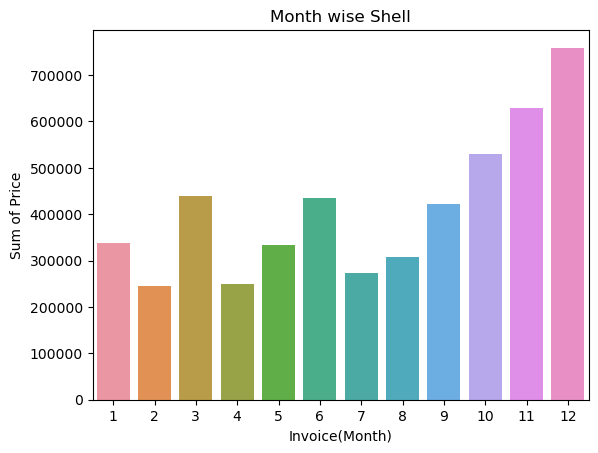

In [41]:
## Repersentation for CEO:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped and summed your DataFrame
grouped_df = df11.groupby('Invoice(Month)').sum()

# Create a bar plot
sns.barplot(x=grouped_df.index, y='Price', data=grouped_df)
# Add labels and a title
plt.xlabel('Invoice(Month)')
plt.ylabel('Sum of Price')
plt.title('Month wise Shell')

# Show the plot
plt.show()

In [20]:
Cancellation = []
for i in df['Invoice']:
    if len(i) == 7 :
        Cancellation.append(i)
len(Cancellation)

19500

In [21]:
Cancellation = []
for i in df['Invoice']:
    if len(i) == 7 :
        Cancellation.append(i)

In [22]:
df[df['Invoice'].apply(lambda x : len(str(x)) == 7)].head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Invoice(YY-MM-DD),Invoice(H-M-S),Invoice(Year),Invoice(Month),Invoice(Day),Invoice(Hour)
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2.95,16321.0,Australia,2009-12-01,10:33:00,2009,12,1,10
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,1.65,16321.0,Australia,2009-12-01,10:33:00,2009,12,1,10
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,4.25,16321.0,Australia,2009-12-01,10:33:00,2009,12,1,10
181,C489449,21896,POTTING SHED TWINE,-6,2.10,16321.0,Australia,2009-12-01,10:33:00,2009,12,1,10
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2.95,16321.0,Australia,2009-12-01,10:33:00,2009,12,1,10


In [23]:
Calcel_Product = df[df['Invoice'].astype(str).str.len() == 7]['Description']
Calcel_Product.head()

178         PAPER BUNTING WHITE LACE
179     CREAM FELT EASTER EGG BASKET
180    POTTING SHED SOW 'N' GROW SET
181               POTTING SHED TWINE
182       PAPER CHAIN KIT RETRO SPOT
Name: Description, dtype: object

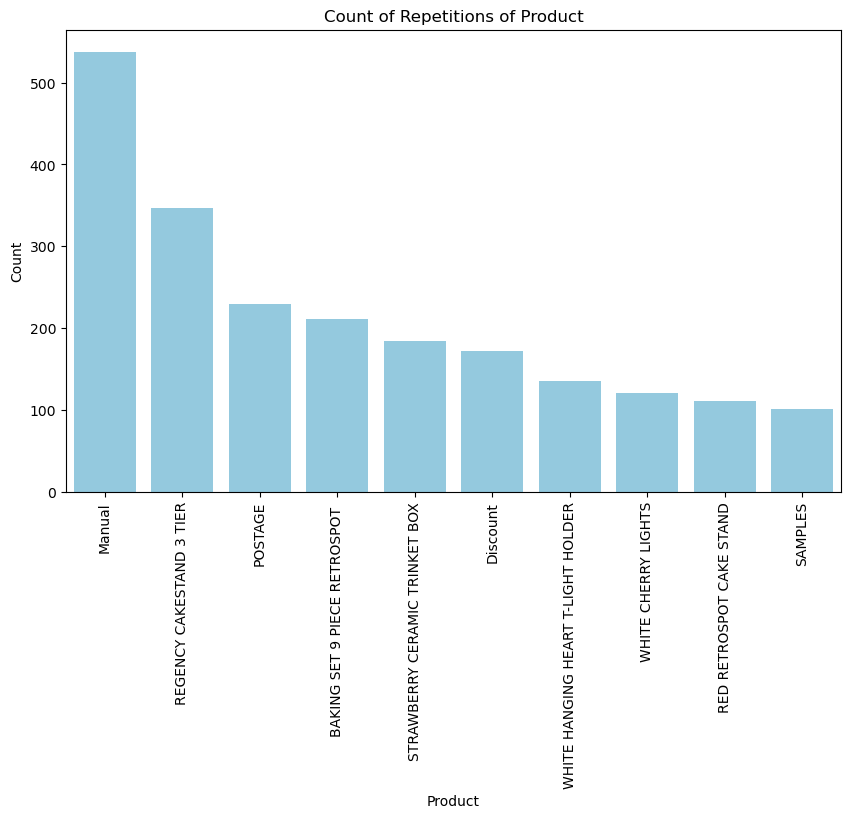

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Series is named 'series_data'

# Count the repetitions of each value in the Series
counts = Calcel_Product.value_counts().head(10)

# Plot the count of repetitions
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=counts.index, y=counts.values, color='skyblue')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Count of Repetitions of Product')

# Show the plot
plt.show()

Here is the list top 10 cancel product, So there is necessary to look into these product in view of the internal and external cause

In [28]:
Popular_Product = df['Description']
Popular_Product.head()

0    15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                     PINK CHERRY LIGHTS
2                    WHITE CHERRY LIGHTS
3           RECORD FRAME 7" SINGLE SIZE 
4         STRAWBERRY CERAMIC TRINKET BOX
Name: Description, dtype: object

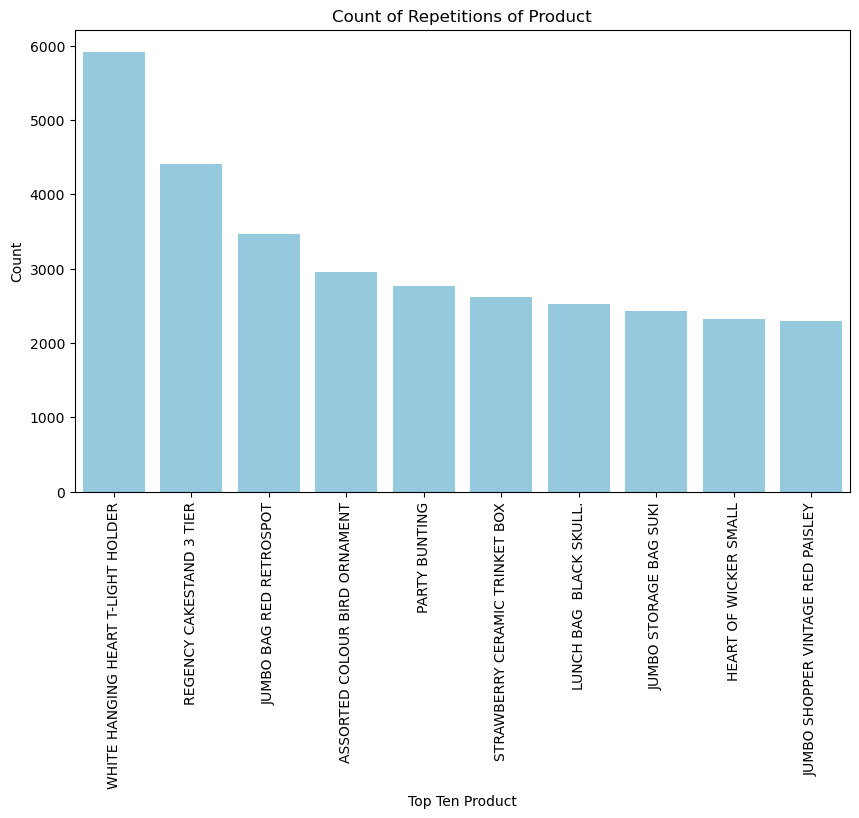

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Series is named 'series_data'

# Count the repetitions of each value in the Series
counts = Popular_Product.value_counts().head(10)

# Plot the count of repetitions
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=counts.index, y=counts.values, color='skyblue')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Top Ten Product')
plt.ylabel('Count')
plt.title('Count of Repetitions of Product')

# Show the plot
plt.show()

Above visual show list of top 10 Product

In [33]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'Invoice(YY-MM-DD)', 'Invoice(H-M-S)',
       'Invoice(Year)', 'Invoice(Month)', 'Invoice(Day)', 'Invoice(Hour)'],
      dtype='object')

In [34]:
Customer = df['Invoice']
Customer.head()

0    489434
1    489434
2    489434
3    489434
4    489434
Name: Invoice, dtype: object

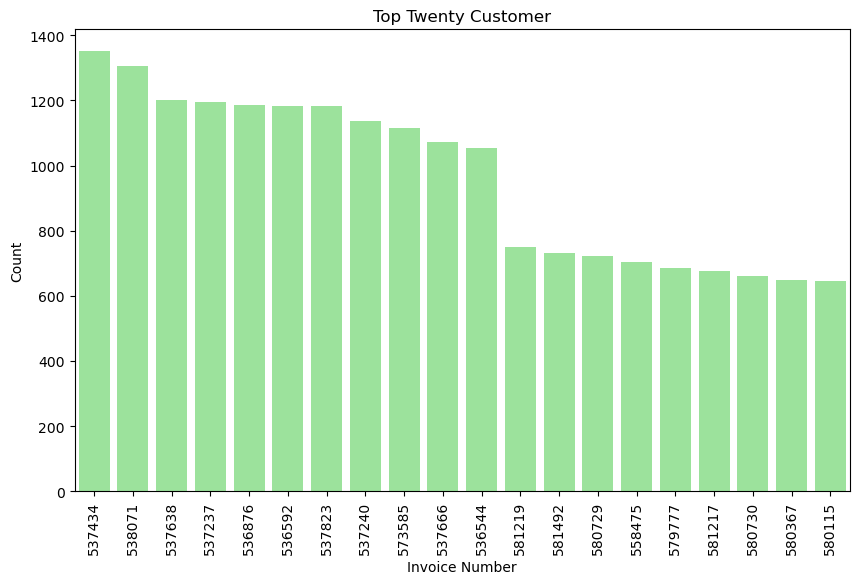

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Series is named 'series_data'

# Count the repetitions of each value in the Series
counts = Customer.value_counts().head(20)

# Plot the count of repetitions
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=counts.index, y=counts.values, color='lightgreen')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Invoice Number')
plt.ylabel('Count')
plt.title('Top Twenty Customer')

# Show the plot
plt.show()

In [42]:
# From above chart it is clear that these are Loyal customers. So personalized marketing strategies is necessary to retain them.

In [ ]:
## Peak hour and Day 

In [43]:
Peak_Hour = df["Invoice(Hour)"]

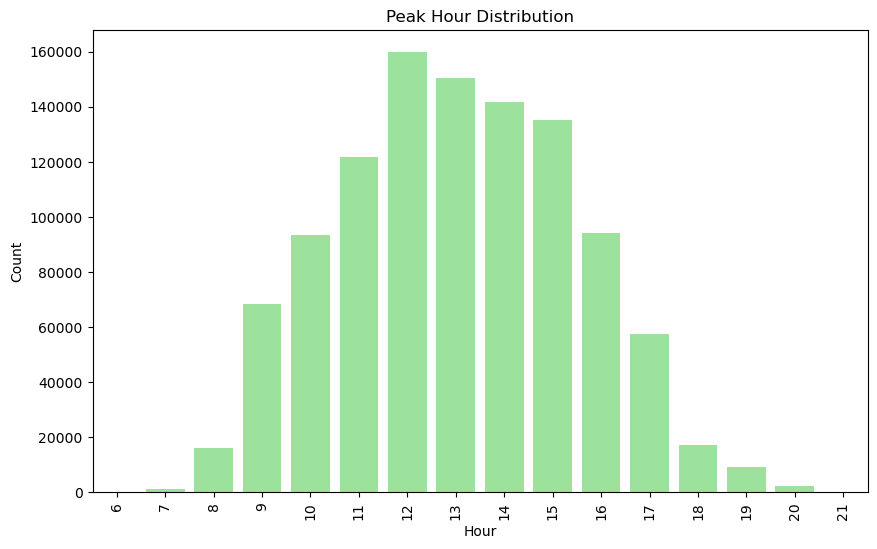

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your Series is named 'series_data'

# Count the repetitions of each value in the Series
counts = Peak_Hour.value_counts().head(20)

# Plot the count of repetitions
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x=counts.index, y=counts.values, color='lightgreen')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Peak Hour Distribution')

# Show the plot
plt.show()

From above it is clear that 11 to 16 is the Peak Hour Range. While 12 is Peakest Hour

<Axes: xlabel='Invoice(YY-MM-DD)'>

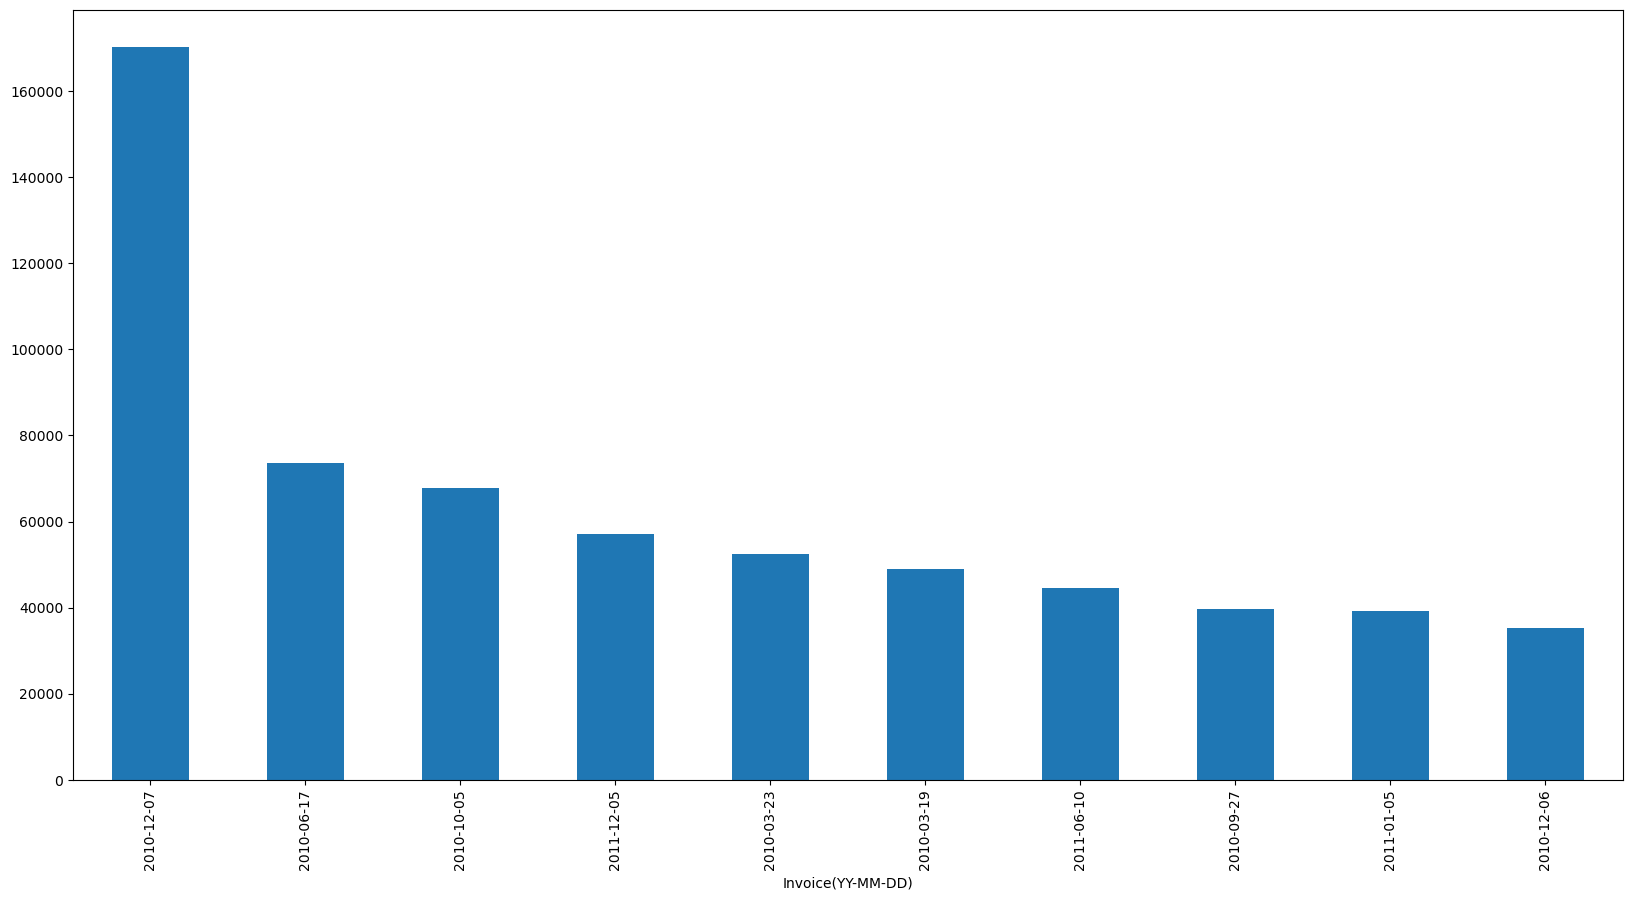

In [68]:
plt.figure(figsize = (20,10))
df.groupby("Invoice(YY-MM-DD)").sum()['Price'].sort_values(ascending = False)[0:10].plot.bar()

From above it is clear that Maximum shell occure on 2010-12-07